In [1]:
# Plot llc90 MITgcm mds output using xmitgcm and cartopy
# November 2018
# Elena Gerwing

In [2]:
import numpy as np
import numpy.ma as ma
from matplotlib import pyplot as plt
from matplotlib import cm,colors,colorbar

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 2.2.2


In [4]:
# With cartopy 0.16.0 matplotlib version needs to be <= 2.2.2 
# because of some issue with GeoAxes: [Axes issue](https://github.com/SciTools/cartopy/issues/1120)

In [5]:
import cartopy.crs as ccrs
import cmocean.cm as cmo
import cartopy.feature as cfeature

In [6]:
import xarray as xr
import xgcm
import xmitgcm

In [7]:
import pprint

In [8]:
import os
# Background images downloaded from: https://neo.sci.gsfc.nasa.gov/
# I downloaded Blue Marble and a Topography
os.environ["CARTOPY_USER_BACKGROUNDS"] = "./backgrounds/"

In [9]:
data_dir = './data/'
grid_dir = './grid/'

In [10]:
ds = xmitgcm.open_mdsdataset(data_dir, grid_dir, geometry='llc',
                             prefix=['Eta'],
                             iters='all',
                             delta_t=3600,
                             ref_date='1979-01-01 00:00:00',
                             swap_dims = False,
                             llc_method = 'smallchunks')
ds

/Users/egerwing/.miniconda3/envs/plot/lib/python3.7/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in ./data/. Using default version.
  "in %s. Using default version." % data_dir)
/Users/egerwing/.miniconda3/envs/plot/lib/python3.7/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/Users/egerwing/.miniconda3/envs/plot/lib/python3.7/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in ./data/. Using default version.
  "in %s. Using default version." % data_dir)
/Users/egerwing/.miniconda3/envs/plot/lib/python3.7/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/Users/egerwing/.miniconda3/envs/plot/lib/python3.7/site-packages/xmitgcm/mds_store.py:735: UserWarning: Couldn't find available_diagnostics.log in ./data/. Usi

<xarray.Dataset>
Dimensions:  (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 2)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 90, 90), chunksize=(1, 90, 90)>
    XG     

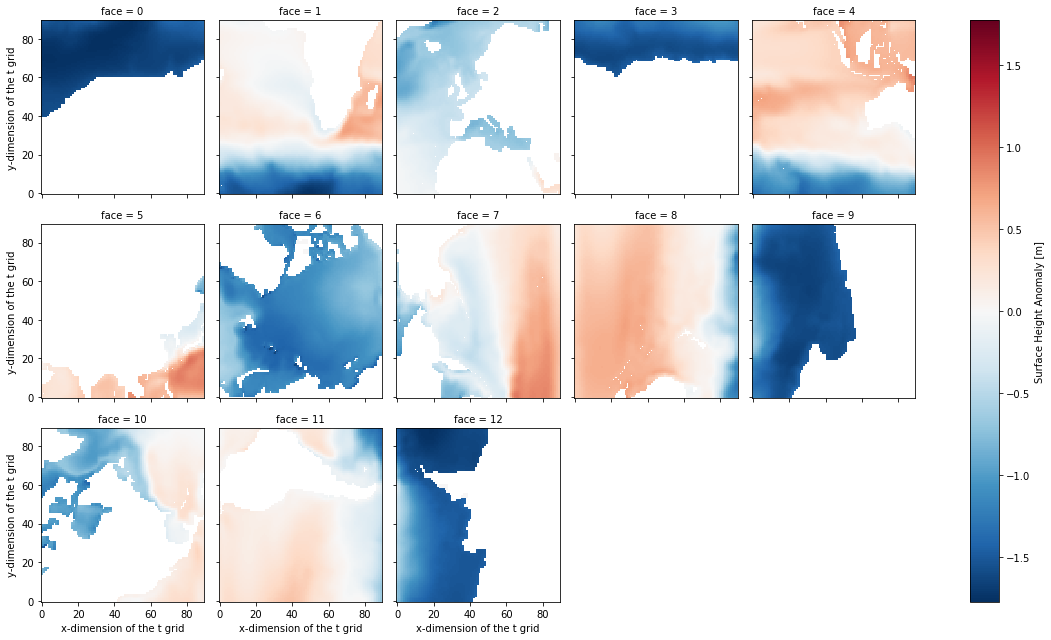

In [11]:
mask = ds.hFacC[0,:,:,:] > 0
eta = ds.ETAN.isel(time=0).load()
eta_masked = eta.where(mask)
eta_masked.plot(col='face', col_wrap=5, cmap='RdBu_r')

## Face connections

Define which faces are lying up, down, left and right of each face in the llc90 configuration.

These functions where copied from: [xmitgcm example: load llc](https://gist.github.com/rabernat/a4158e23f50470f1a55be54910a2134b)

In [12]:
face_edge_link = {
    0: {'N': (1, 'S', 1), 'S': None, 'E': (3, 'W', 1), 'W': (12, 'N', -1)},
    1: {'N': (2, 'S', 1), 'S': (0, 'N', 1), 'E': (4, 'W', 1), 'W': (11, 'N', -1)},
    2: {'N': (6, 'W', -1), 'S': (1, 'N', 1), 'E': (5, 'W', 1), 'W': (10, 'N', -1)},
    3: {'N': (4, 'S', 1), 'S': None, 'E': (9, 'S', -1), 'W': (0, 'E', 1)},
    4: {'N': (5, 'S', 1), 'S': (3, 'N', 1), 'E': (8, 'S', -1), 'W': (1, 'E', 1)},
    5: {'N': (6, 'S', 1), 'S': (4, 'N', 1), 'E': (7, 'S', -1), 'W': (2, 'E', 1)},
    6: {'N': (10, 'W', -1), 'S': (5, 'N', 1), 'E': (7, 'W', 1), 'W': (2, 'N', -1)},
    7: {'N': (10, 'S', 1), 'S': (5, 'E', -1), 'E': (8, 'W', 1), 'W': (6, 'E', 1)},
    8: {'N': (11, 'S', 1), 'S': (4, 'E', -1), 'E': (9, 'W', 1), 'W': (7, 'E', 1)},
    9: {'N': (12, 'S', 1), 'S': (3, 'E', -1), 'E': None, 'W': (8, 'E', 1)},
    10: {'N': (2, 'W', -1), 'S': (7, 'N', 1), 'E': (11, 'W', 1), 'W': (6, 'N', -1)},
    11: {'N': (1, 'W', -1), 'S': (8, 'N', 1), 'E': (12, 'W', 1), 'W': (10, 'E', 1)},
    12: {'N': (0, 'W', -1), 'S': (9, 'N', 1), 'E': None, 'W': (11, 'E', 1)}
}

In [13]:
face_connections = {}
for k in range(13):
    links = face_edge_link[k]
    x0, x1 = links['W'], links['E']
    y0, y1 = links['S'], links['N']
    if x0:
        x0reverse = x0[1] not in ['E', 'N']
        x0ax = 'X' if x0[1] in ['E', 'W'] else 'Y' 
        x0 = (x0[0],) + (x0ax, x0reverse)
    if x1:
        x1reverse = x1[1] not in ['W', 'S']
        x1ax = 'X' if x1[1] in ['E', 'W'] else 'Y' 
        x1 = (x1[0],) + (x1ax, x1reverse)
    if y0:
        y0reverse = y0[1] not in ['N', 'E']
        y0ax = 'Y' if y0[1] in ['N', 'S'] else 'X' 
        y0 = (y0[0],) + (y0ax, y0reverse)
    if y1:
        y1reverse = y1[1] not in ['S', 'W']
        y1ax = 'Y' if y1[1] in ['N', 'S'] else 'X' 
        y1 = (y1[0],) + (y1ax, y1reverse)
    face_connections[k] = {'X': (x0, x1), 'Y': (y0, y1)}

pprint.pprint(face_connections)

{0: {'X': ((12, 'Y', False), (3, 'X', False)), 'Y': (None, (1, 'Y', False))},
 1: {'X': ((11, 'Y', False), (4, 'X', False)),
     'Y': ((0, 'Y', False), (2, 'Y', False))},
 2: {'X': ((10, 'Y', False), (5, 'X', False)),
     'Y': ((1, 'Y', False), (6, 'X', False))},
 3: {'X': ((0, 'X', False), (9, 'Y', False)), 'Y': (None, (4, 'Y', False))},
 4: {'X': ((1, 'X', False), (8, 'Y', False)),
     'Y': ((3, 'Y', False), (5, 'Y', False))},
 5: {'X': ((2, 'X', False), (7, 'Y', False)),
     'Y': ((4, 'Y', False), (6, 'Y', False))},
 6: {'X': ((2, 'Y', False), (7, 'X', False)),
     'Y': ((5, 'Y', False), (10, 'X', False))},
 7: {'X': ((6, 'X', False), (8, 'X', False)),
     'Y': ((5, 'X', False), (10, 'Y', False))},
 8: {'X': ((7, 'X', False), (9, 'X', False)),
     'Y': ((4, 'X', False), (11, 'Y', False))},
 9: {'X': ((8, 'X', False), None), 'Y': ((3, 'X', False), (12, 'Y', False))},
 10: {'X': ((6, 'Y', False), (11, 'X', False)),
      'Y': ((7, 'Y', False), (2, 'X', False))},
 11: {'X': ((10

## Extension and rotation of fields

In [14]:
def extend_field(ds,variable,face,face_connections,t=0,k=0):
    '''Extend the field of the current face by one row/column of the neighbouring faces
       in order to get an overlap
       ds: xarray dataset, variable: name of variable (string), face: current face number, 
       face_connections: dictionary defining the face connections, t: time step to plot,
       k: vertical level to plot
    '''
    
    # Find number of faces left,right,up and down of current face
    if face_connections[face]['X'][0] == None:
        fl = face
    else:
        fl = face_connections[face]['X'][0][0]
    if face_connections[face]['X'][1] == None: 
        fr = face
    else:
        fr = face_connections[face]['X'][1][0]
    if face_connections[face]['Y'][0] == None:
        fd = face
    else:
        fd = face_connections[face]['Y'][0][0]
    if face_connections[face]['Y'][1] == None:
        fu = face
    else:
        fu = face_connections[face]['Y'][1][0]
        
    # Check dimensions of input field and reduce to a 2D field    
    if len(ds[variable].dims) == 3:
        current_face = ds[variable][face,:,:]
        left_face = ds[variable][fl,:,:]
        right_face = ds[variable][fr,:,:]
        down_face = ds[variable][fd,:,:]
        up_face = ds[variable][fu,:,:]
    elif len(ds[variable].dims) == 4:
        current_face = ds[variable][t,face,:,:]
        left_face = ds[variable][t,fl,:,:]
        right_face = ds[variable][t,fr,:,:]
        down_face = ds[variable][t,fd,:,:]
        up_face = ds[variable][t,fu,:,:]
    elif len(ds[variable].dims) == 5:
        current_face = ds[variable][t,k,face,:,:]
        left_face = ds[variable][t,k,fl,:,:]
        right_face = ds[variable][t,k,fr,:,:]
        down_face = ds[variable][t,k,fd,:,:]
        up_face = ds[variable][t,k,fu,:,:]
    else:
        print ('Wrong number of dimensions. Allowed dimensions: (face,j,i), (time,face,j,i), (depth,face,j,i) and (time,depth,face,j,i)')
    
    ####### LEFT #############################
    if face_connections[face]['X'][0] == None:
        left = left_face.load()[:,0]
    elif face_connections[face]['X'][0][1] == 'X':
        left = left_face.load()[:,-1]
    else:
        left = np.flipud(left_face.load()[-1,:])

    ####### RIGHT ############################    
    if face_connections[face]['X'][1] == None:
        right = right_face.load()[:,-1]
    elif face_connections[face]['X'][1][1] == 'X':
        right = right_face.load()[:,0]
    else:
        right = np.flipud(right_face.load()[0,:])
    
    ####### DOWN #############################
    if face_connections[face]['Y'][0] == None:
        d = down_face.load()[0,:]
    elif face_connections[face]['Y'][0][1] == 'X':
        d = np.flipud(down_face.load()[:,-1])
    else:
        d = down_face.load()[-1,:]
   
    ####### UP ###############################
    if face_connections[face]['Y'][1] == None:
        d = up_face.load()[-1,:]
    if face_connections[face]['Y'][1][1] == 'X':
        u = np.flipud(up_face.load()[:,0])
    else:
        u = up_face.load()[0,:]
    
    # insert one point at the beginning and the end of the row 
    # in order to fit the shape of the field with extensions left and right
    down = np.insert(d,0,d[0])
    down = np.insert(down,-1,d[-1])
    up = np.insert(u,0,u[0])
    up = np.insert(up,-1,u[-1]) 

    data_ext_x = np.c_[left,current_face.load()[:,:],right]
    data_ext = np.concatenate((np.expand_dims(down,axis=0),data_ext_x,np.expand_dims(up,axis=0)),axis=0)
    
    return data_ext

## North Polar Stereographic projection

In [15]:
def plotArctic(ds, variable, vmin, vmax, time=0, projection=ccrs.NorthPolarStereo(central_longitude=0.0),
              lonmin=-180.0, lonmax=180.0, latmin=55.0, latmax=90.0, background = 'fc',
              cmap='viridis', cbar_label = 'Sea surface elevation anomaly (m)'):

    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(1, 1, 1, projection=projection)
    
    ax.set_global()
    # Set the extent of the map (cartopy-specific)
    ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
    fig.canvas.draw()
    
    if background == 'fc':
        ax.add_feature(cfeature.LAND, facecolor='darkkhaki', zorder=0)
    elif background == 'bm':
        ax.background_img(name='BM_jun', resolution='high')
    elif background == 'topo':
        ax.background_img(name='topo_grey', resolution='high')
    elif background == 'stock':
        ax.stock_img()
        
    ax.coastlines(resolution='110m') # also possible: 50, 10,...

    for face in [2,5,6,7,10]:
        data = extend_field(ds,variable,face,face_connections,t=time)
        mask =  extend_field(ds,'hFacC',face,face_connections)
        data_masked = ma.masked_where(mask == 0.0,data)
        XG = extend_field(ds,'XC',face,face_connections)
        YG = extend_field(ds,'YC',face,face_connections)
        
        ax.pcolormesh(XG, YG, data_masked, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmap)
    
    xgrid = np.arange(-180, 190, 20)
    ygrid = np.arange(  20,  95, 10)
    ax.gridlines(xlocs=xgrid, ylocs=ygrid, color='dimgray', linestyle='--', zorder=3)
    
    river = cfeature.GSHHSFeature(scale='intermediate', levels=[2],edgecolor='steelblue',facecolor='steelblue')
    ax.add_feature(river)

    plt.text(1500000, -3700000,'{}'.format(str(ds.time.isel(time=time).data)[:10]),fontsize=20,color='w')
        
    # Add colorbar
    cbax = fig.add_axes([0.92, 0.125, 0.04, 0.755]) # color bar                                          
    cbar = colorbar.ColorbarBase(cbax, cmap=cmap, norm = colors.Normalize(vmin=vmin, vmax=vmax),orientation='vertical')
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(cbar_label, fontsize=16)

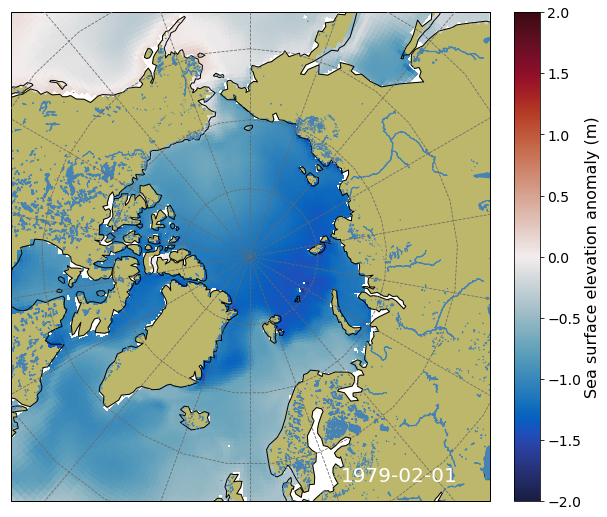

In [16]:
plotArctic(ds,variable='ETAN', vmin=-2.0, vmax=2.0,time=0,cmap=cmo.balance)

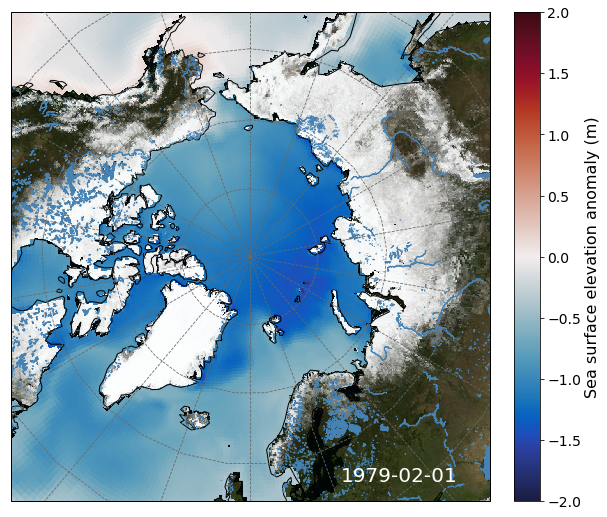

In [17]:
plotArctic(ds,variable='ETAN', vmin=-2.0, vmax=2.0,time=0,cmap=cmo.balance, background = 'bm')

## Plot global data

In [30]:
def plotAllFaces(ds, vmin, vmax, time=0,projection=ccrs.PlateCarree(central_longitude=0.), background = 'fc',
                 cmap = 'viridis', cbar_label = 'Sea surface elevation anomaly (m)'):

    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(1, 1, 1, projection=projection)

    ax.set_global()
    
    if background == 'fc':
        ax.add_feature(cfeature.LAND, facecolor='0.75', zorder=0)
    elif background == 'bm':
        ax.background_img(name='BM_jun', resolution='high')
    elif background == 'topo':
        ax.background_img(name='topo_grey', resolution='high')
    elif background == 'stock':
        ax.stock_img()
        
    ax.coastlines(resolution='110m')
    
    transpose = [6, 7, 8, 9, 10, 11, 12]
    for face in np.arange(0,13):
        data = extend_field(ds,'ETAN',face,face_connections,t=time)
        mask =  extend_field(ds,'hFacC',face,face_connections)
        data_masked = ma.masked_where(mask == 0.0,data)
        XG = extend_field(ds,'XG',face,face_connections)
        YG = extend_field(ds,'YG',face,face_connections)
 #       XG = np.where(XG > 0.0,XG,XG+360.0)
        if face in transpose:
            XG = np.where(XG >= 0.0,XG,XG+360.0)
            XG = XG.T
            YG = YG.T
            data_masked = data_masked.T
            
        ax.pcolormesh(XG, YG, data_masked, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmap)
  #      ax.contourf(XG, YG, data_masked, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmap)
        
    gl = ax.gridlines(draw_labels=False,color='dimgray', linestyle='--', zorder=3)

    cbax = fig.add_axes([0.85, 0.125, 0.02, 0.75]) # color bar                                          
 #   cbar = colorbar.ColorbarBase(cbax, cmap=cmap, norm=colors.BoundaryNorm(clevs, cmap.N),orientation='vertical')
    cbar = colorbar.ColorbarBase(cbax, cmap=cmap, norm = colors.Normalize(vmin=vmin, vmax=vmax),orientation='vertical')
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(cbar_label, fontsize=16)
    

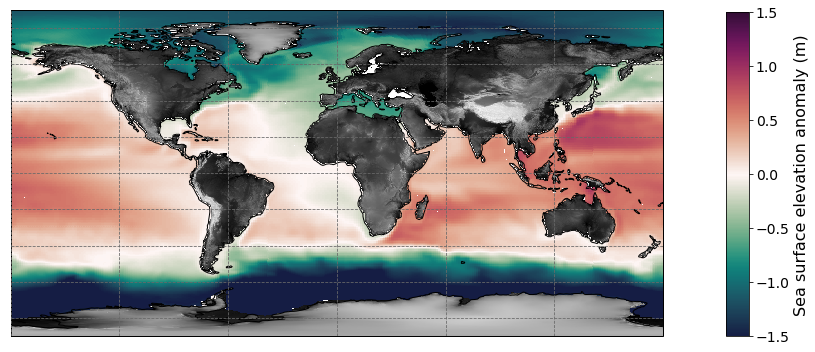

In [31]:
plotAllFaces(ds, vmin=-1.5, vmax=1.5,time=0,cmap=cmo.curl, background = 'topo')

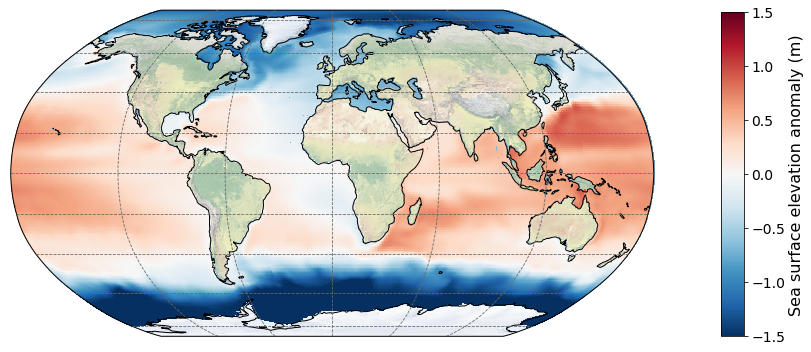

In [22]:
plotAllFaces(ds, vmin=-1.5, vmax=1.5,time=0,projection=ccrs.Robinson(),cmap='RdBu_r', background = 'stock')